DATA INITIALIZATION

In [ ]:
#import nbconvert #recode the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

a = pd.read_csv('Housing.csv') # Training set is already available
a.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
d=a.describe()
d

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Text(0.5, 1.0, 'Bar plot of the count of numeric features')

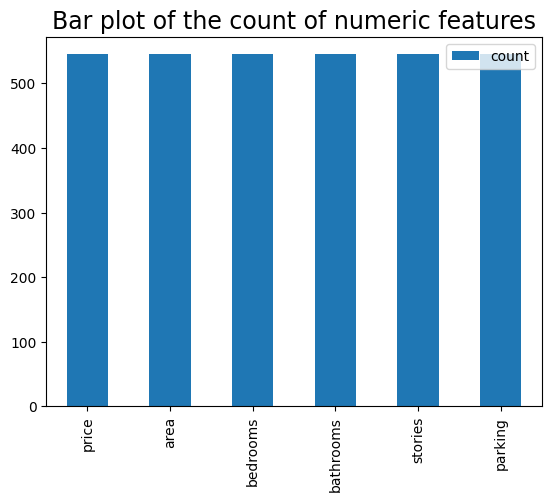

In [ ]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

<ipython-input-9-7fd04bfce175>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price',data=a,palette='RdBu_r')


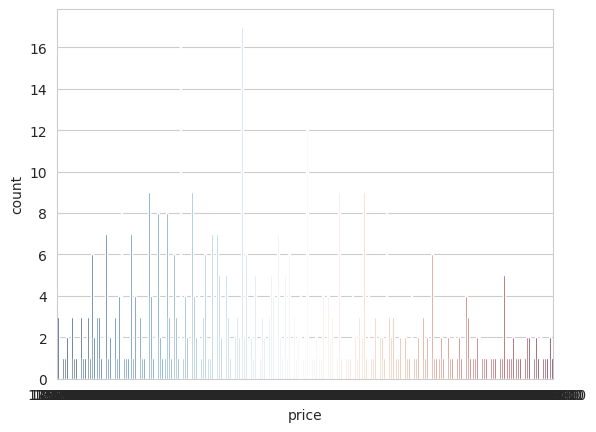

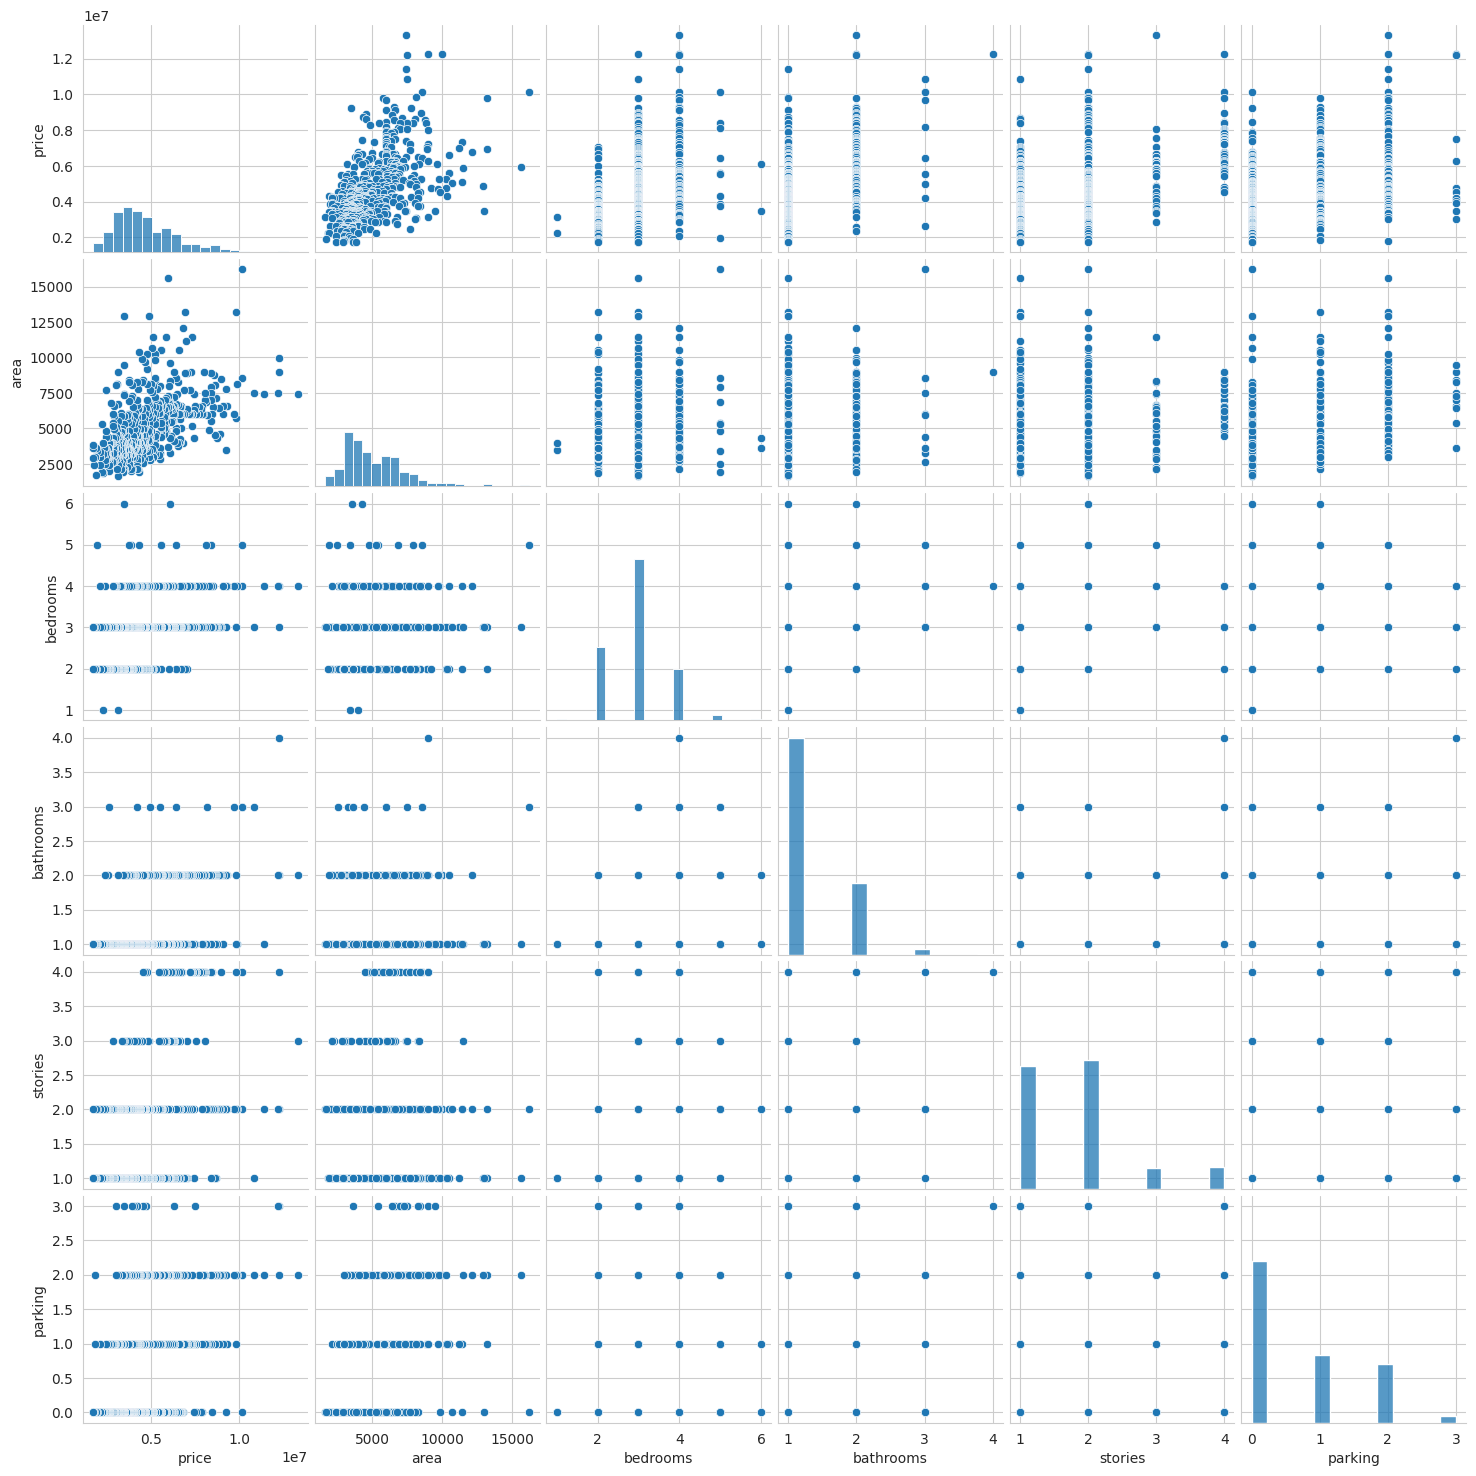

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='price',data=a,palette='RdBu_r')
sns.pairplot(a)

Logistic Regression model fit and prediction

In [ ]:
import pandas as pd

# Assuming 'a' contains your dataset
train1 = pd.DataFrame(a)

# Convert binary columns to numeric
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
train1[columns_to_convert] = train1[columns_to_convert].replace({'yes': 1, 'no': 0})

# Convert furnishingstatus to numeric
train1['furnishingstatus'] = train1['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 1})

# Print the updated DataFrame
#print(train1)

train=train1.drop('stories',axis=1)

print(train)

        price  area  bedrooms  bathrooms  mainroad  guestroom  basement  \
0    13300000  7420         4          2         1          0         0   
1    12250000  8960         4          4         1          0         0   
2    12250000  9960         3          2         1          0         1   
3    12215000  7500         4          2         1          0         1   
4    11410000  7420         4          1         1          1         1   
..        ...   ...       ...        ...       ...        ...       ...   
540   1820000  3000         2          1         1          0         1   
541   1767150  2400         3          1         0          0         0   
542   1750000  3620         2          1         1          0         0   
543   1750000  2910         3          1         0          0         0   
544   1750000  3850         3          1         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0  

In [ ]:
y=train['price']
print(y)
X=train.drop("price",axis=1)
print(X)


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
     area  bedrooms  bathrooms  mainroad  guestroom  basement  \
0    7420         4          2         1          0         0   
1    8960         4          4         1          0         0   
2    9960         3          2         1          0         1   
3    7500         4          2         1          0         1   
4    7420         4          1         1          1         1   
..    ...       ...        ...       ...        ...       ...   
540  3000         2          1         1          0         1   
541  2400         3          1         0          0         0   
542  3620         2          1         1          0         0   
543  2910         3          1         0          0         0   
544  3850         3          1         1          0         0   

    

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('price',axis=1),train['price'],
    test_size=0.30,random_state=111)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

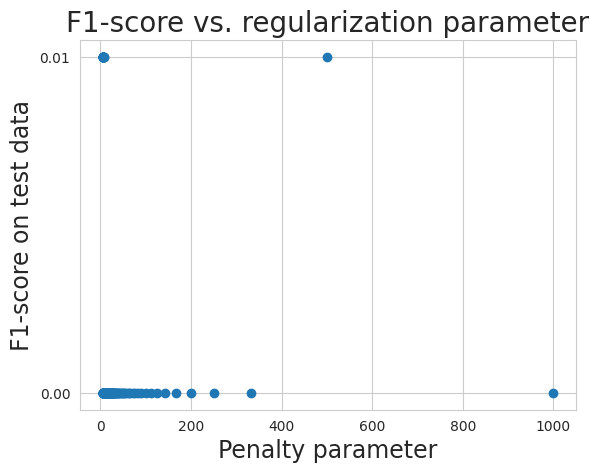

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=int(1e6),
                                         n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

F1-score as a function of test set size (fraction)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

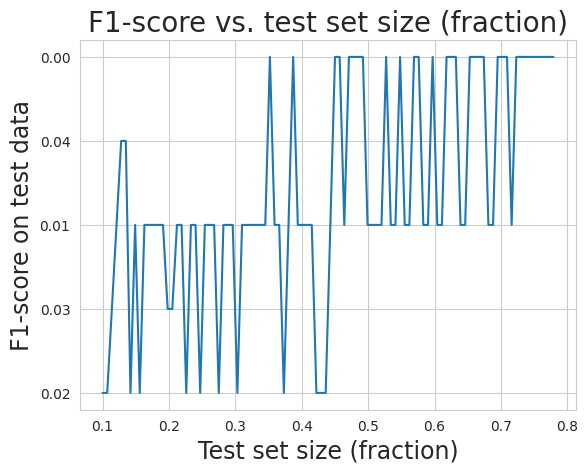

In [ ]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
test_fraction =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(train.drop('price',axis=1),
                                                    train['price'], test_size=0.1+(i-1)*0.007,
                                                    random_state=111)
        logmodel =(LogisticRegression(C=1,tol=1e-4, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        test_fraction[i]=0.1+(i-1)*0.007

plt.plot(test_fraction[1:len(test_fraction)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. test set size (fraction)",fontsize=20)
plt.xlabel("Test set size (fraction)",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

F1-SCORE AS A FUNCTION OF RANDOM SEED OF TRAIN/TEST SPLIT

1.   List item
2.   List item



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

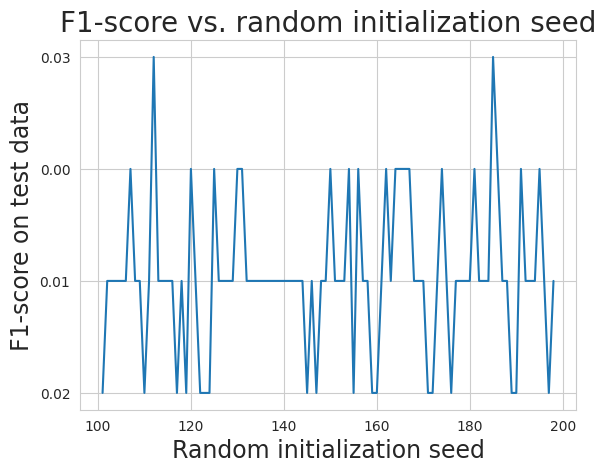

In [ ]:
nsimu=101
class_report = [0]*nsimu
f1=[0]*nsimu
random_init =[0]*nsimu
for i in range(1,nsimu):
        X_train, X_test, y_train, y_test = train_test_split(train.drop('price',axis=1),
                                                    train['price'], test_size=0.3,
                                                    random_state=i+100)
        logmodel =(LogisticRegression(C=1,tol=1e-5, max_iter=1000,n_jobs=4))
        logmodel.fit(X_train,y_train)
        predictions = logmodel.predict(X_test)
        class_report[i] = classification_report(y_test,predictions)
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        random_init[i]=i+100

plt.plot(random_init[1:len(random_init)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. random initialization seed",fontsize=20)
plt.xlabel("Random initialization seed",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

ACCURACY

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load and prepare dataset
data = load_iris()
X = data.data
y = data.target
is_class_0_or_1 = (y == 0) | (y == 1)
X = X[is_class_0_or_1]
y = y[is_class_0_or_1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


PRECISION

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.datasets import load_iris

# Load and prepare the Iris dataset for binary classification
data = load_iris()
X = data.data
y = data.target

# Filter to keep only two classes (0 and 1 for example)
is_class_0_or_1 = (y == 0) | (y == 1)
X = X[is_class_0_or_1]
y = y[is_class_0_or_1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model using accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")


Accuracy: 1.00
Precision: 1.00


CORRELATION MATRIX

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the dataset (Iris dataset used for demonstration)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Compute the correlation matrix
correlation_matrix = X.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


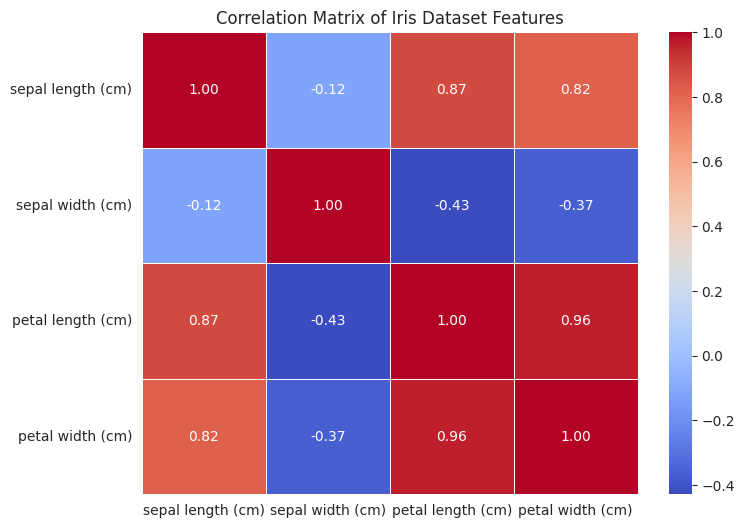

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the dataset (Iris dataset used for demonstration)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Compute the correlation matrix
correlation_matrix = X.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()


LINEAR REGRESSION

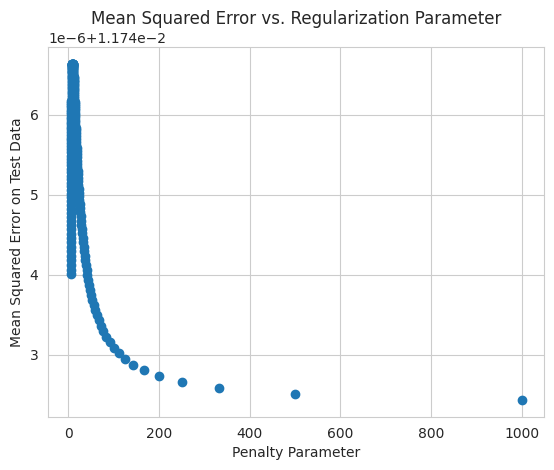

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming you have your training and testing data: X_train, X_test, y_train, y_test

nsimu = 201
penalty = [0] * nsimu
ridge_models = [0] * nsimu
mse = [0] * nsimu

for i in range(1, nsimu):
    alpha = i / 1000
    ridge_models[i] = Ridge(alpha=alpha)
    ridge_models[i].fit(X_train, y_train)
    y_pred = ridge_models[i].predict(X_test)
    mse[i] = mean_squared_error(y_test, y_pred)
    penalty[i] = 1000 / i

plt.scatter(penalty[1:len(penalty) - 2], mse[1:len(mse) - 2])
plt.title("Mean Squared Error vs. Regularization Parameter")
plt.xlabel("Penalty Parameter")
plt.ylabel("Mean Squared Error on Test Data")
plt.show()


F1-score as a function of random seed of test/train split

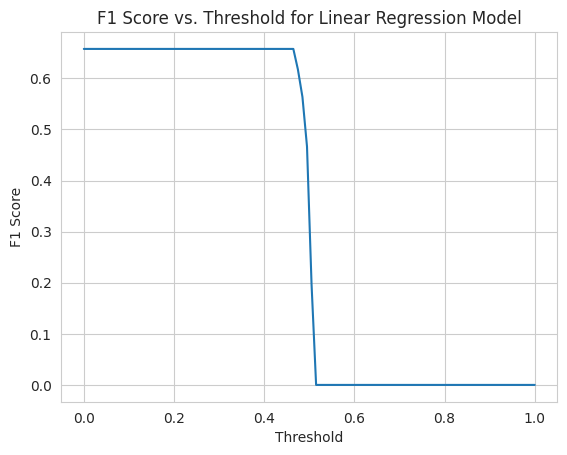

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 1)  # Example feature data
y = np.random.randint(0, 2, size=(100,))  # Example binary target labels (0 or 1)

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the training set (for demonstration purposes)
y_pred = model.predict(X)

# Initialize lists to store threshold values and corresponding F1 scores
thresholds = np.linspace(0, 1, num=100)  # Threshold values from 0 to 1
f1_scores = []

# Compute F1 score for each threshold
for threshold in thresholds:
    y_pred_binary = np.where(y_pred > threshold, 1, 0)
    f1 = f1_score(y, y_pred_binary)
    f1_scores.append(f1)

# Plot F1 score against threshold values
plt.plot(thresholds, f1_scores)
plt.title('F1 Score vs. Threshold for Linear Regression Model')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


F1-score as a function of test set size (fraction)

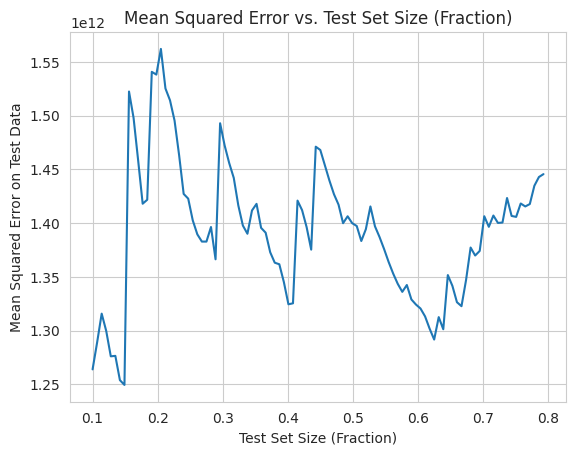

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

nsimu = 101
mse = [0] * nsimu
test_fraction = [0] * nsimu

for i in range(1, nsimu):
    X_train, X_test, y_train, y_test = train_test_split(train.drop('price', axis=1),
                                                        train['price'],
                                                        test_size=0.1 + (i - 1) * 0.007,
                                                        random_state=111)
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)

    y_pred = lin_model.predict(X_test)

    mse[i] = mean_squared_error(y_test, y_pred)
    test_fraction[i] = 0.1 + (i - 1) * 0.007

plt.plot(test_fraction[1:], mse[1:])
plt.title("Mean Squared Error vs. Test Set Size (Fraction)")
plt.xlabel("Test Set Size (Fraction)")
plt.ylabel("Mean Squared Error on Test Data")
plt.show()


ACCURACY

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your training and testing data: X_train, X_test, y_train, y_test

# Train a linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_model.predict(X_test)

# Discretize predictions and true labels (for demonstration purposes only)
y_pred_class = np.where(y_pred > 0.5, 1, 0)
y_test_class = np.where(y_test > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy:", accuracy)


Accuracy: 1.0


R^2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have your training and testing data: X_train, X_test, y_train, y_test

# Train a linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


R-squared (R2) score: 0.593939210098702


MSE

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have your training and testing data: X_train, X_test, y_train, y_test

# Train a linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1445620587027.166


RMSE

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your training and testing data: X_train, X_test, y_train, y_test

# Train a linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1202339.6304818226


PRECISION

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.datasets import load_iris

# Load and prepare the Iris dataset for regression
data = load_iris()
X = data.data
y = data.target

# Use one of the features as the target variable
y = X[:, 0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Define a threshold for categorizing predictions and true labels
threshold = 0.5  # You can adjust this threshold as needed

# Convert predictions and true labels to binary classes based on the threshold
y_pred_binary = np.where(y_pred > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)

# Output the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")


Accuracy: 1.00
Precision: 1.00


MATRIX REPRESENTATION

In [ ]:
from sklearn.linear_model import LinearRegression

# Assume X_train and y_train are your training data
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
print("Coefficients:", model.coef_)

# Intercept
print("Intercept:", model.intercept_)


Coefficients: [ 1.00000000e+00 -1.15356846e-16 -1.64399655e-16  1.71642881e-16]
Intercept: 3.552713678800501e-15


SVM

F1 SCORE

In [ ]:
df_feat = train.drop('price',axis=1)
df_feat.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,1,0,0,0,1,2,1,1
1,8960,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,1,0,1,0,0,2,1,1
3,7500,4,2,1,0,1,0,1,3,1,1
4,7420,4,1,1,1,1,0,1,2,0,1


In [ ]:
df_target = train['price']
df_target.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_feat,df_target,test_size=0.30,random_state=101)

In [ ]:
X_train.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
227,6000,2,1,1,0,1,0,1,1,0,1
319,3000,4,1,1,0,1,0,1,2,0,1
367,3630,2,1,1,0,0,0,1,0,0,0
515,3210,3,1,1,0,1,0,0,0,0,0
143,4800,5,2,0,0,1,1,0,0,0,0


In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
print(confusion_matrix(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     2100000       0.00      0.00      0.00         2
     2240000       0.00      0.00      0.00         1
     2345000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         3
     2520000       0.00      0.00      0.00         1
     2590000       0.00      0.00      0.00         1
     2660000       0.00      0.00      0.00         3
     2835000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     3003000       0.00      0.00      0.00         1
     3010000       0.00      0.00      0.00         3
     3129000       0.00      0.00      0.00         1
     3150000       0.00      0.00      0.00         3
     3290000       0.00      0.00      0.00         4
     3332000       0.00      0.00      0.00         1
     3353000       0.00      0.00      0.00         1
     3360000       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Misclassification error rate:",round(np.mean(predictions!=y_test),3))

Misclassification error rate: 0.97


In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1767150       0.00      0.00      0.00         0
     2100000       0.00      0.00      0.00         2
     2240000       0.00      0.00      0.00         1
     2310000       0.00      0.00      0.00         0
     2345000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         3
     2520000       0.00      0.00      0.00         1
     2590000       0.00      0.00      0.00         1
     2604000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         3
     2730000       0.00      0.00      0.00         0
     2835000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         0
     3003000       0.00      0.00      0.00         1
     3010000       0.00      0.00      0.00         3
     3080000       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
param_grid = {'C': [50,75,100,125,150], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(tol=1e-5),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(tol=1e-05),
             param_grid={'C': [50, 75, 100, 125, 150],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=1)

In [ ]:
grid.best_estimator_

SVC(C=75, gamma=0.01, tol=1e-05)

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


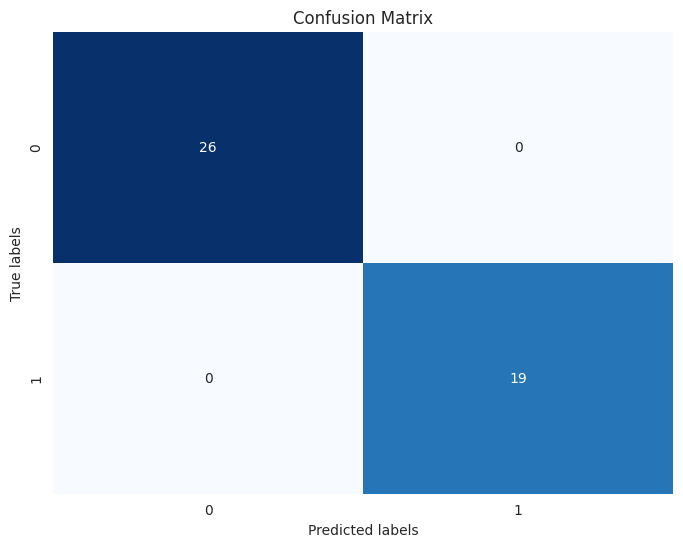

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the dataset (Iris dataset used for demonstration)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# For simplicity, let's focus on binary classification (e.g., class 0 vs. others)
y_binary = (y == 0).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


ACCURACY AND PRECISION

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

# Assuming you have already trained your SVM classifier and made predictions
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.03048780487804878
Precision: 0.000929506246281975


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Load a dataset (for example, the Iris dataset)
data = datasets.load_iris()
X = data.data
y = data.target

# For binary classification, let's focus on classifying class 1 vs. the rest
y = (y == 1).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for optimal performance with SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)


F1 Score: 0.4761904761904762


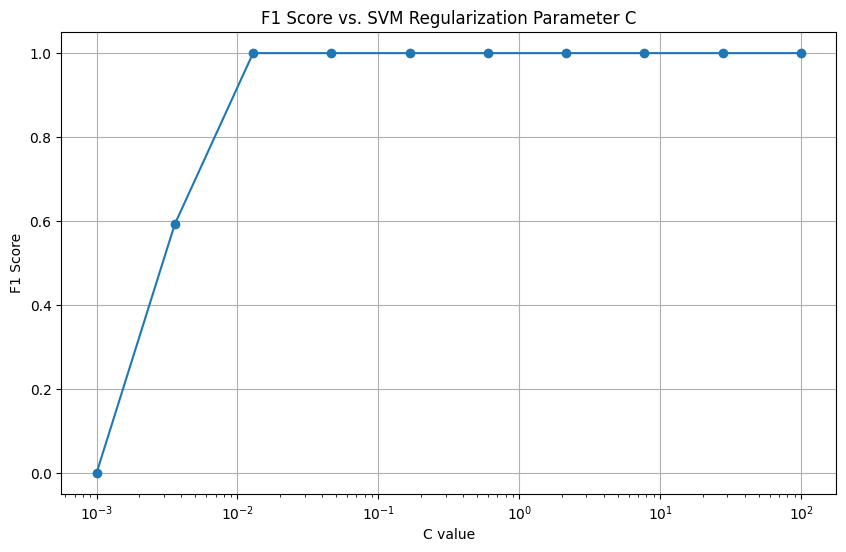

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Load a dataset (for example, the Iris dataset)
data = datasets.load_iris()
X = data.data
y = data.target

# For simplicity, let's focus on binary classification (e.g., class 0 vs. others)
y = (y == 0).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Range of C values to explore
C_values = np.logspace(-3, 2, 10)
f1_scores = []

# Train SVM and calculate F1 score for each C value
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    score = f1_score(y_test, y_pred)
    f1_scores.append(score)

# Plotting F1 scores
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, f1_scores, marker='o')
plt.xlabel('C value')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. SVM Regularization Parameter C')
plt.grid(True)
plt.show()
